In [103]:
import pandas as pd
import numpy as np

In [104]:
df = pd.read_csv("laptops.csv")

In [105]:
df.head()

,Index,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
lm  = LinearRegression()

In [108]:
X = df[['CPU_frequency']]
Y = df['Price']

In [109]:
type(X)

pandas.core.frame.DataFrame

In [110]:
lm.fit(X, Y)

LinearRegression()

In [111]:
Yhat = lm.predict(X)
Yhat[:10]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057, 1073.07834392, 1073.07834392, 1073.07834392,
       1534.00050386, 1175.50549057])

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

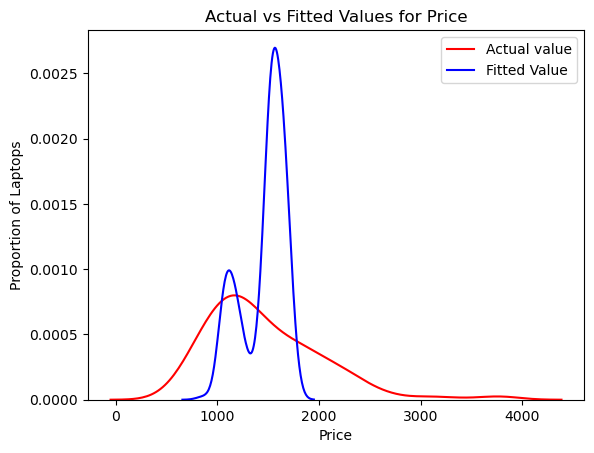

In [113]:
ax1 = sns.kdeplot(Y, label='Actual value', color='r')
sns.kdeplot(Yhat, label='Fitted Value', color='b', ax=ax1)
plt.legend(['Actual value', 'Fitted Value'])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel("Proportion of Laptops")
plt.show()

In [114]:
from sklearn.metrics import mean_squared_error, r2_score

In [115]:
mse_slr = mean_squared_error(Y, Yhat)
mse_slr

284583.4405868628

In [116]:
r2_score_slr = lm.score(X, Y)
r2_score_slr

0.13444363210243282

In [117]:
mlr_model = LinearRegression()

In [118]:
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]

In [119]:
mlr_model.fit(Z, Y)
Yhat = mlr_model.predict(Z)
Yhat[:10]

array([1345.51622771,  710.44905496, 1552.37242687, 1295.00681012,
       1543.13847022, 1056.42067418, 1252.02084839,  806.98504446,
       1007.51446753, 1449.64309091])

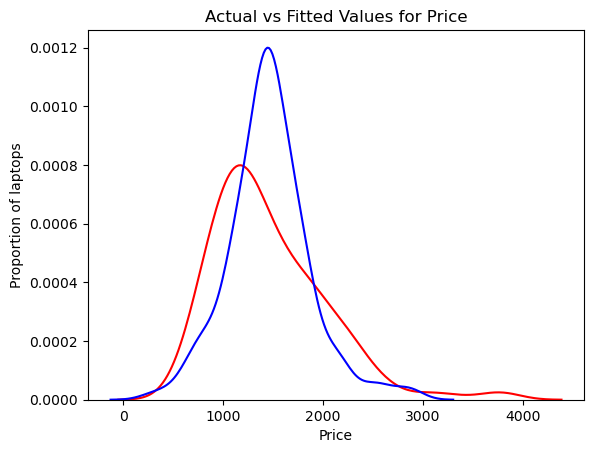

In [120]:
ax1 = sns.kdeplot(Y, color="r", label="Actual Value")
sns.kdeplot(Yhat, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.show()

In [121]:
mse_mlr = mean_squared_error(Y, Yhat)
mse_mlr

161680.57263893107

In [122]:
r2_score_mlr = mlr_model.score(Z, Y)
r2_score_mlr

0.5082509055187374

In [123]:
type(X)

pandas.core.frame.DataFrame

In [124]:
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [125]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

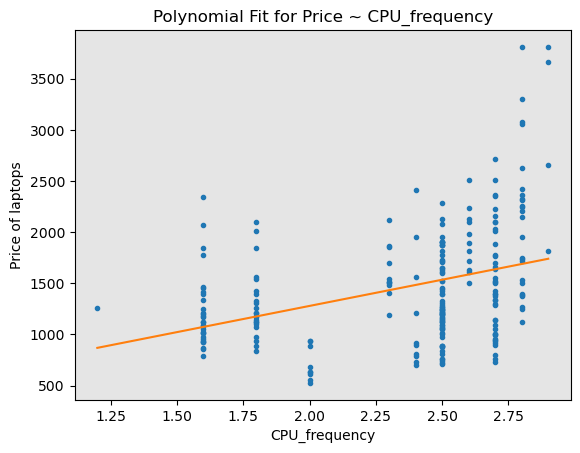

In [126]:
PlotPolly(p1, X, Y, 'CPU_frequency')

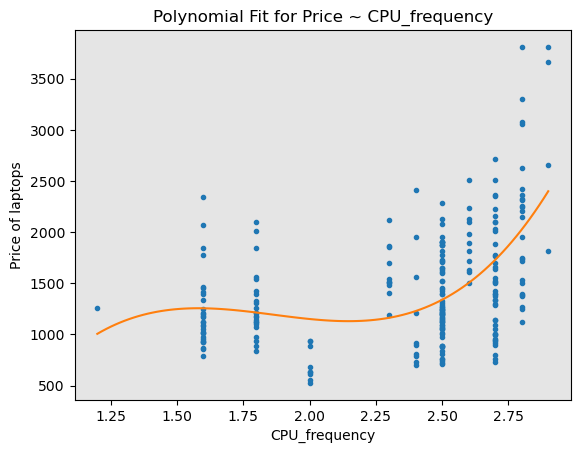

In [127]:

PlotPolly(p3, X, Y, 'CPU_frequency')

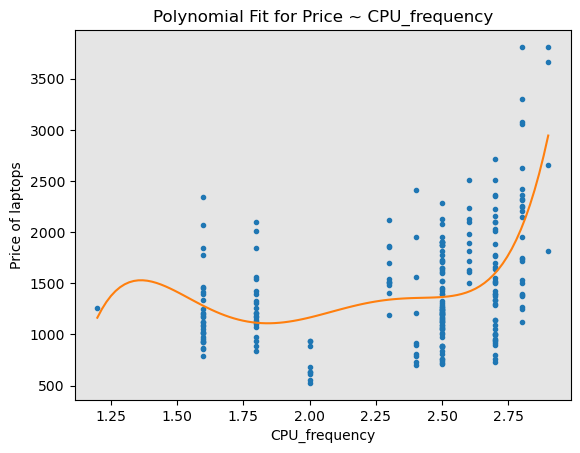

In [128]:

PlotPolly(p5, X, Y, 'CPU_frequency')

In [129]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.13444363210243238
The MSE value for 1st degree polynomial is:  284583.44058686297
The R-square value for 3rd degree polynomial is:  0.26692640796531064
The MSE value for 3rd degree polynomial is:  241024.86303848785
The R-square value for 5th degree polynomial is:  0.30308227064423787
The MSE value for 5th degree polynomial is:  229137.29548058507


In [130]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [141]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [142]:
pipe = Pipeline(Input)
Z = Z.astype(float)

In [143]:
pipe.fit(Z, Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [149]:
ypipe = pipe.predict(Z)

In [150]:
ypipe[:10]

array([1484.18227261,  778.36551848, 1267.81424349, 1009.69942066,
       1505.21474521, 1152.24349691, 1045.58822688, 1028.75504321,
        812.53544869, 1187.29147848])

In [151]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  120595.86128028373
R^2 for multi-variable polynomial pipeline is:  0.6332094535859658


You should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.